In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [103]:
data = pd.read_csv("data/critics.notes.csv", sep=";;;; ")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
data.head()

,Comment,Note
0,film plutôt décevant! le rôle confié à Vincent...,1.0
1,Vraiment Excellent ! Très original et les acte...,4.5
2,Cherchant encore un quelconque attrait pour Af...,2.0
3,Un thème pas facile à traiter au cinéma sans t...,4.5
4,"Un très bon film , une histoire touchante et d...",5.0


In [55]:
data["Note"].groupby(level=0)

####  Display on plotbar number of critics  by note 

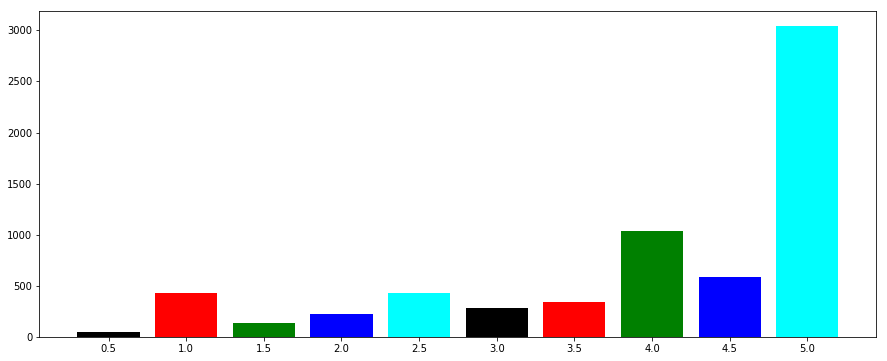

In [56]:
axe_y = [len(frame) for group,frame in data.groupby("Note")] 
axe_x = [str(group) for group,frame in data.groupby("Note")]
plt.figure(figsize=(15,6))
plt.bar(x = axe_x, height = axe_y, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()
plt.close()

In [57]:
all_text = ' '.join([text for text in data['Comment']])

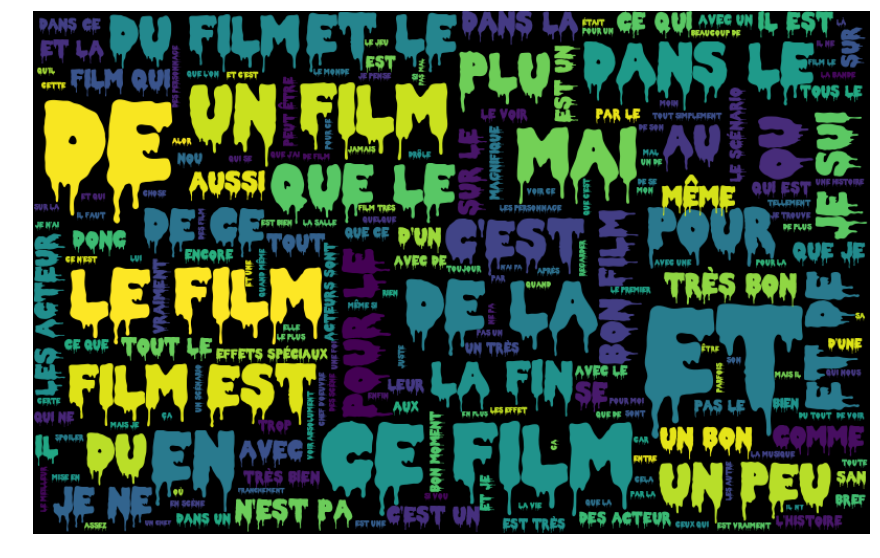

In [58]:
wordcloud = WordCloud(font_path='data/spooky_font.ttf', width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Since this is a classification, it's important to clean up all text (remove ponctuation, lower text,stopword, etc.)

In [37]:
!pip install -U nltk

Requirement already up-to-date: nltk in /opt/conda/lib/python3.6/site-packages (3.4.1)


In [52]:
#!python -m nltk.downloader all

In [104]:
from nltk.tokenize import word_tokenize

data["Comment_clean"] = pd.Series()
for index, text in enumerate(data["Comment"]):
    #print(text)
    tokens = word_tokenize(text)
    
    #convert to lower case
    tokens = [w.lower() for w in tokens]

    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('french'))
    n_words = ""
    #for w in words:
    #    if not w in stop_words:
    #        n_words = n_words + " "  + w
    words = [w for w in words if not w in stop_words]
    data["Comment_clean"][index] = words
    print("text processed..")
    #print(words[:100])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed

text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..
text processed..


In [98]:
print(data["Comment_clean"][0])

['film', 'plutôt', 'décevant', 'rôle', 'confié', 'vincent', 'cassel', 'va', 'tout', 'seul', 'intérêt', 'film', 'certaine', 'intrigue', 'cest', 'bien', 'seule', 'chose', 'sauve', 'lennui', 'totalla', 'fin', 'film', 'manque', 'dimaginationquant', 'scène', 'combat', 'sauna', 'vigo', 'mortensen', 'montrant', 'bijoux', 'famille', 'dune', 'laideur', 'vraiment', 'déplacée', 'les', 'temps', 'courent']


### Embedding by word2vec

In [99]:
from gensim.models.word2vec import Word2Vec

text_dim = 300
print("Training Word2Vec model...")
wordvec_model = Word2Vec(data["Comment_clean"], size=text_dim, window=5, min_count=3, workers=4, sg=1)
print("Word2Vec model created.")
print("%d unique words represented by %d dimensional vectors" % (len(wordvec_model.wv.vocab), text_dim))

Training Word2Vec model...
Word2Vec model created.
9555 unique words represented by 300 dimensional vectors


In [100]:
xx = [x for x in wordvec_model.wv.vocab]
xx

['film',
 'plutôt',
 'décevant',
 'rôle',
 'vincent',
 'cassel',
 'va',
 'tout',
 'seul',
 'intérêt',
 'certaine',
 'intrigue',
 'cest',
 'bien',
 'seule',
 'chose',
 'sauve',
 'lennui',
 'fin',
 'manque',
 'scène',
 'combat',
 'mortensen',
 'montrant',
 'bijoux',
 'famille',
 'dune',
 'vraiment',
 'les',
 'temps',
 'courent',
 'excellent',
 'très',
 'original',
 'acteurs',
 'joue',
 'parfaitement',
 'recommande',
 'cherchant',
 'encore',
 'quelconque',
 'attrait',
 'javoue',
 'trouve',
 'peu',
 'si',
 'commence',
 'comme',
 'sympa',
 'entre',
 'potes',
 'avides',
 'passer',
 'bon',
 'après',
 'trop',
 'longues',
 'minutes',
 'vers',
 'survival',
 'pur',
 'dur',
 'malheureusement',
 'filles',
 'a',
 'contre',
 'nature',
 'lâche',
 'mauvais',
 'moment',
 'bande',
 'légèrement',
 'post',
 'jen',
 'passe',
 'dintérêt',
 'concernant',
 'lhistoire',
 'personnages',
 'naide',
 'censé',
 'lier',
 'spectateur',
 'sort',
 'importe',
 'nest',
 'rebondissement',
 'final',
 'thème',
 'facile',
 't

In [102]:
print(wordvec_model.wv.most_similar(positive=['femme', 'roi'], negative=['homme']))
#print(wordvec_model.wv.most_similar_cosmul(positive=['femme', 'roi'], negative=['homme']))
#print(wordvec_model.wv.doesnt_match("breakfast cereal dinner lunch".split()))
#print(wordvec_model.wv.similarity('femme', 'homme'))
#print(wordvec_model.wv.similarity('gruesome', 'terrify'))

[('in', 0.9659612774848938), ('papa', 0.9588112831115723), ('rééducation', 0.9571188688278198), ('projection', 0.9539036154747009), ('accident', 0.9534229040145874), ('lord', 0.9529666900634766), ('nouvelle', 0.9522319436073303), ('man', 0.9494839906692505), ('war', 0.9487998485565186), ('american', 0.9486076831817627)]
